In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
a = np.array([23, 21, 19, 24, 35, 17, 18, 24, 33, 27, 21, 23])
b = np.array([31, 28, 19, 24, 32, 27, 16, 41, 23, 32, 29, 33])

In [5]:
a.mean()

np.float64(23.75)

In [6]:
b.mean()

np.float64(27.916666666666668)

In [7]:
d = b.mean() - a.mean()
d

np.float64(4.166666666666668)

In [8]:
np.ones(len(b))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
np.append(np.zeros(len(a)), np.ones(len(b)))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [10]:
sales = np.array([
    np.append(np.zeros(len(a)), np.ones(len(b))),
    np.append(a, b)
])

In [11]:
print(sales)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.]
 [23. 21. 19. 24. 35. 17. 18. 24. 33. 27. 21. 23. 31. 28. 19. 24. 32. 27.
  16. 41. 23. 32. 29. 33.]]


In [12]:
sales_t = sales.T
sales_t

array([[ 0., 23.],
       [ 0., 21.],
       [ 0., 19.],
       [ 0., 24.],
       [ 0., 35.],
       [ 0., 17.],
       [ 0., 18.],
       [ 0., 24.],
       [ 0., 33.],
       [ 0., 27.],
       [ 0., 21.],
       [ 0., 23.],
       [ 1., 31.],
       [ 1., 28.],
       [ 1., 19.],
       [ 1., 24.],
       [ 1., 32.],
       [ 1., 27.],
       [ 1., 16.],
       [ 1., 41.],
       [ 1., 23.],
       [ 1., 32.],
       [ 1., 29.],
       [ 1., 33.]])

In [13]:
np.random.shuffle(sales_t) #بر زدن

In [14]:
sales_t

array([[ 0., 17.],
       [ 1., 27.],
       [ 1., 41.],
       [ 1., 23.],
       [ 0., 19.],
       [ 1., 31.],
       [ 0., 24.],
       [ 1., 28.],
       [ 0., 27.],
       [ 1., 19.],
       [ 1., 33.],
       [ 1., 32.],
       [ 1., 24.],
       [ 0., 23.],
       [ 1., 29.],
       [ 0., 35.],
       [ 0., 24.],
       [ 1., 32.],
       [ 0., 21.],
       [ 0., 21.],
       [ 0., 18.],
       [ 1., 16.],
       [ 0., 33.],
       [ 0., 23.]])

In [15]:
experiment_label = np.random.randint(0, 2, len(sales_t))
experiment_label #تولید صفر  یک رندوم

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1], dtype=int32)

In [16]:
experiment_data = np.array([
    experiment_label,
    sales_t[:, 1]
])
print(experiment_data)

[[ 1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  1.  0.  0.  0.  1.
   1.  0.  1.  1.  1.  1.]
 [17. 27. 41. 23. 19. 31. 24. 28. 27. 19. 33. 32. 24. 23. 29. 35. 24. 32.
  21. 21. 18. 16. 33. 23.]]


In [17]:
experiment_data_t = experiment_data.T
experiment_data_t

array([[ 1., 17.],
       [ 0., 27.],
       [ 0., 41.],
       [ 0., 23.],
       [ 0., 19.],
       [ 0., 31.],
       [ 1., 24.],
       [ 0., 28.],
       [ 0., 27.],
       [ 1., 19.],
       [ 1., 33.],
       [ 0., 32.],
       [ 0., 24.],
       [ 1., 23.],
       [ 0., 29.],
       [ 0., 35.],
       [ 0., 24.],
       [ 1., 32.],
       [ 1., 21.],
       [ 0., 21.],
       [ 1., 18.],
       [ 1., 16.],
       [ 1., 33.],
       [ 1., 23.]])

In [18]:
experiment_data_t[experiment_data_t[:, 0] == 1][:, 1]

array([17., 24., 19., 33., 23., 32., 21., 18., 16., 33., 23.])

In [19]:
experiment_data_t[experiment_data_t[:, 0] == 0][:, 1].mean()

np.float64(27.76923076923077)

In [20]:
experiment_data_t[experiment_data_t[:, 0] == 1][:, 1].mean()

np.float64(23.545454545454547)

In [21]:
np.empty([10,1])

array([[1.4115e-320],
       [7.7771e-320],
       [5.3359e-321],
       [9.5572e-320],
       [2.8547e-320],
       [2.8547e-320],
       [9.5572e-320],
       [5.3359e-321],
       [7.7771e-320],
       [1.4115e-320]])

In [22]:
def sh_exp(N):
    experiment_diff_mean = np.empty([N, 1])
    for times in np.arange(N):
        experiment_label = np.random.randint(0, 2, len(sales_t))
        experiment_data = np.array([
            experiment_label,
            sales_t[:, 1]
        ]).T
        experiment_diff_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
    return experiment_diff_mean

In [23]:
e1 = sh_exp(1000000)

In [24]:
# print(e1)

In [25]:
len(e1[e1 >= d]) #P Value

64148

In [28]:
64148 / 1000000 * 100

6.4148

C:\Users\Aria\AppData\Local\Temp\ipykernel_21752\2476525324.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(e1, bins=50)


<Axes: ylabel='Density'>

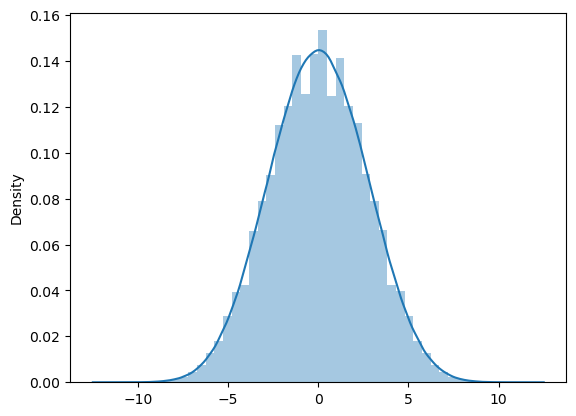

In [27]:
sns.distplot(e1, bins=50)